In [2]:
#Import Libraries
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA #for dimensionality reduction (PCA)

from sklearn.cluster import KMeans

# to display plots in Jupyter notebook or IPython
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D #for 3d visualization

# optional: suppress warnings
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore


import plotly.graph_objects as go


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Import dataset
customer_data = pd.read_csv('/content/drive/MyDrive/Training_Datasets/Market Analysis/marketing_campaign.csv', delimiter='\t')

In [5]:
customer_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
customer_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In this section, we will deal with the following:


*   Identify the key variables that we will use for clustering from the original dataset
*   Missing values - Excluded 24 customers with missing values


*   Outliers - Excluded 1 customer with >600k annual income
*   Categorical Variables - Let's assess the categorical variables and decide if we want to group them differently

*   Feature Engineering

In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.







In [ ]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
#identified the features we want
select_features = ['Year_Birth','Education','Marital_Status','Income','Dt_Customer',
               'Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
               'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
               'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

#filter the database to only those features
customer_data = customer_data.loc[:,select_features]
customer_data.head(5)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [ ]:
#Missing Values
# Create a dictionary of column names and number of missing values
missing_cols = dict(customer_data.isnull().sum())

# Filter only the columns with missing values
missing_cols = {k: v for k, v in missing_cols.items() if v != 0}

# Create a DataFrame with columns with missing values and number of missing values
missing_cols_df = pd.DataFrame(list(missing_cols.items()), columns=['Column Name', 'Number of Missing Values'])

# Print the resulting DataFrame
print(missing_cols_df)

  Column Name  Number of Missing Values
0      Income                        24


Out of the 2,000+ customers in our dataset, there are 24 customers for whom we do not have income information available. While we could attempt to predict their incomes using their other attributes, it is important to note that these 24 customers represent a small portion of the total dataset. In order to develop a practical customer segmentation model, it may not be necessary to include 100% of the customers.

Therefore, it has been decided to remove these 24 customers from our analysis. By doing so, we can focus on the remaining customers who have complete information, which will still provide us with valuable insights for customer segmentation.

In [ ]:
# Print the number of rows in the original dataframe
print(f"Number of rows before removing missing values: {len(customer_data)}")

# Count the number of missing values in each row
num_missing = customer_data.isnull().sum().sum()
print(f"Number of missing rows: {num_missing}")

# Remove rows with missing values
customer_data = customer_data.dropna()

# Print the number of rows after removing missing values
print(f"Number of rows after removing missing values: {len(customer_data)}")

Number of rows before removing missing values: 2240
Number of missing rows: 24
Number of rows after removing missing values: 2216


In our database, we initially had a total of 2,240 customers. However, 24 of them had to be removed from the analysis due to missing values. As a result, we now have 2,216 customers remaining for further analysis. We will proceed with conducting the follow-up analysis using these 2,216 customers, as they provide a complete set of data that can contribute to our insights and decision-making process.

In [ ]:
#Outliers


# Identify numerical variables
num_vars = customer_data.select_dtypes(include=np.number).columns

# Calculate z-scores for numerical variables
df_zscore = customer_data[num_vars].apply(zscore)

# Define threshold for identifying outliers
threshold = 8

# Count number of outliers for each numerical variable
for var in num_vars:
    outliers = (df_zscore[var] > threshold) | (df_zscore[var] < -threshold)
    num_outliers = outliers.sum()
    if num_outliers > 0:
        print('Variable:', var, '| Number of outliers:', num_outliers)

Variable: Income | Number of outliers: 1
Variable: NumWebPurchases | Number of outliers: 1
Variable: NumCatalogPurchases | Number of outliers: 3


Let's examine each column individually to identify any major outliers present. By analyzing each column separately, we can gain a better understanding of the outliers and their impact on the data.

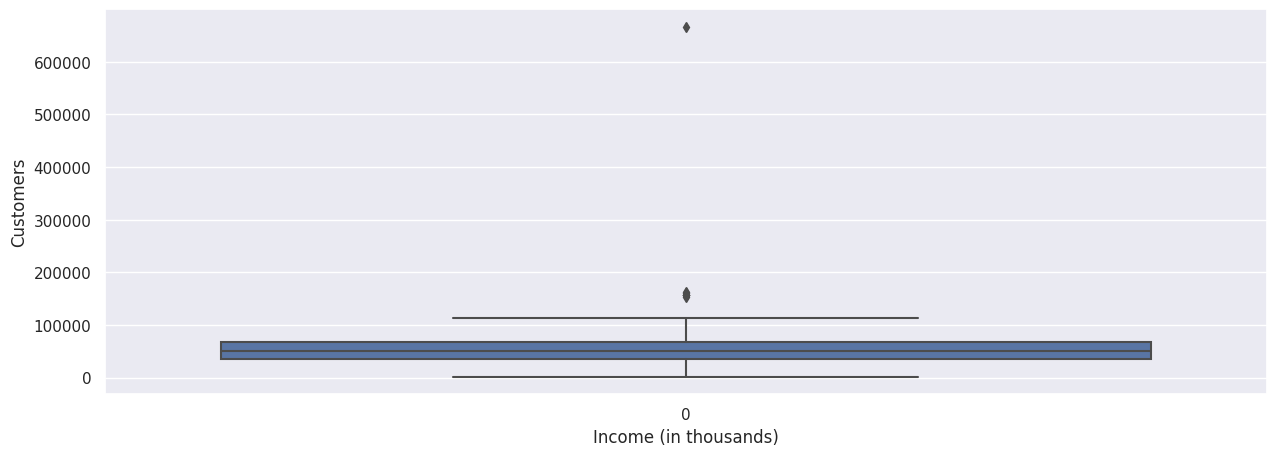

Number of customers where income is greater than 200k: 1


In [ ]:
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(customer_data['Income'])

# Set labels for the x-axis and y-axis
plt.xlabel('Income (in thousands)')
plt.ylabel('Customers')

# Display the plot
plt.show()

#let's count the number of $200k+ customers
outlier_incomes =(customer_data['Income']>200000).sum()
# Print the result
print('Number of customers where income is greater than 200k:', outlier_incomes)

There is only one customer in our dataset with an income greater than $200,000.

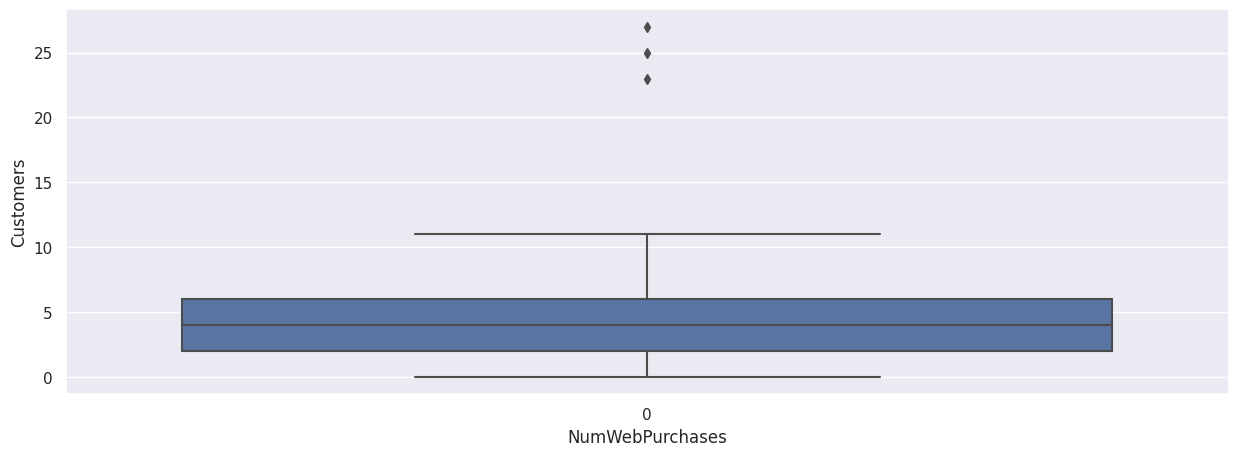

Number of customers where income is greater than 200k: 3


In [ ]:
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(customer_data['NumWebPurchases'])

# Set labels for the x-axis and y-axis
plt.xlabel('NumWebPurchases')
plt.ylabel('Customers')

# Display the plot
plt.show()

#let's count the number of 20+ purchasers
outlier_incomes =(customer_data['NumWebPurchases']>20).sum()
# Print the result
print('Number of customers where income is greater than 200k:', outlier_incomes)

There are three customers in our dataset with an income greater than $200,000.

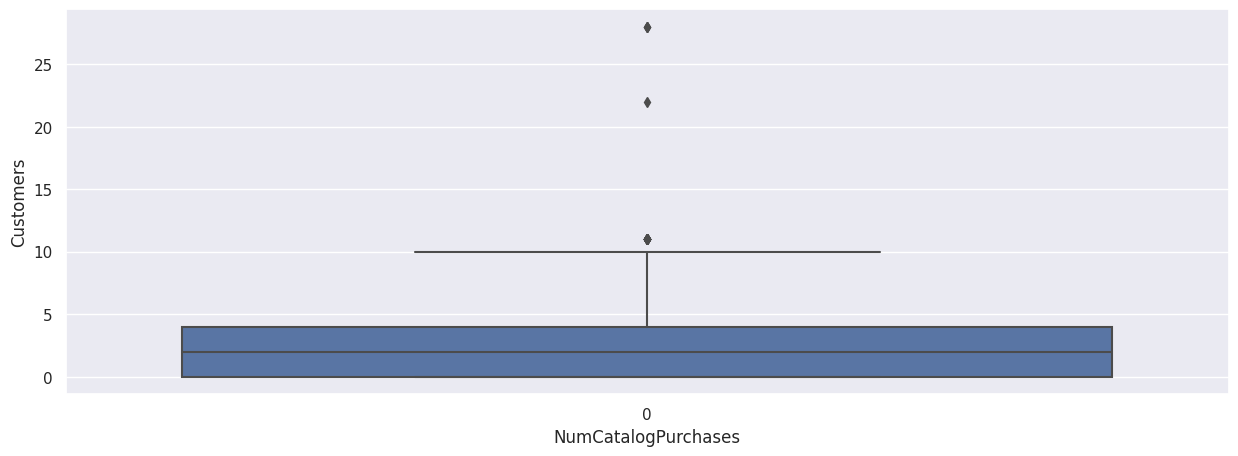

Number of customers where NumCatalogPurchases is greater than 20: 4


In [ ]:
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(customer_data['NumCatalogPurchases'])

# Set labels for the x-axis and y-axis
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Customers')

# Display the plot
plt.show()

#let's count the number of 20+ purchasers
outlier_incomes =(customer_data['NumCatalogPurchases']>20).sum()
# Print the result
print('Number of customers where NumCatalogPurchases is greater than 20:', outlier_incomes)

There are four customers in our dataset who have made more than 20 catalog purchases (NumCatalogPurchases).


To exclude customers with income exceeding 200k, you can apply a filter to the dataset. 

In [ ]:
# Print the number of rows in the original dataframe
print(f"Number of rows before removing missing values: {len(customer_data)}")

# Count the number of missing values in each row
outlier_income = len(customer_data[customer_data['Income']>200000])
print(f"Number of missing rows: {outlier_income}")

# Remove rows with missing values
customer_data = customer_data[customer_data['Income']<200000]

# Print the number of rows after removing missing values
print(f"Number of rows after removing missing values: {len(customer_data)}")

Number of rows before removing missing values: 2216
Number of missing rows: 1
Number of rows after removing missing values: 2215


# **Categorical Variables Asessement**


We will evaluate and assess the following categorical variables for potential grouping:



1.   Education
2.   Marital Status


For each of these variables, we will analyze their current categories and consider whether they can be grouped together in a more meaningful and insightful manner. This grouping process will allow us to derive more valuable insights from these variables.

In [ ]:
education_counts = customer_data['Education'].value_counts()
marstatus_counts = customer_data['Marital_Status'].value_counts()

print(education_counts)
print(marstatus_counts)

Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


Based on the given considerations, we will make the following changes to the categorical variables:


1.   Education: We will group "Basic" under "2nd Cycle" as there are very few instances of "Basic" and it is closely related to the "2nd Cycle" category.
2.   Marital Status: We will group "Alone," "Absurd," and "YOLO" as "Single" since they represent individuals who are not married.Additionally, we will group "Divorced" and "Widow" together as they share similarities in terms of marital status.

These groupings are based on logical reasoning and will help us reduce the number of categorical features once we perform one-hot encoding.

In [ ]:
# We will create a nested dictionary to map values to their replacements for each categorical feature. 
# The changes we discussed earlier will be reflected in this mapping.

value_map = {
    'Education':{
        'Basic':'2n Cycle',
    },
    'Marital_Status':{
        'Alone':'Single',
        'Absurd':'Single',
        'YOLO':'Single',
        'Widow':'Divorced/Widowed',
        'Divorced':'Divorced/Widowed',
    }
}

# We will loop through each categorical feature in the dataframe and replace the values based on the mapping we created earlier.


for feature_name in value_map:
    if feature_name in customer_data.columns:
        #get the value map for the current feature
        feature_value_map=value_map[feature_name]
        
        # replace values in the current feature based on the mapping
        customer_data[feature_name]= customer_data[feature_name].map(feature_value_map).fillna(customer_data[feature_name])

# **Feature Engineering**

We will create additional features as specified and make the necessary changes to handle the case where Total_Purchases is zero. 


*   Cust_Age = today-Year_Birth

*   Total_Sales = MntWines+ MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds

*   Total_Purchases = NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases

*   Avg_Purchase = Total_Sales/Total_Purchases
*   Deal_Share = NumDealsPurchases/Total_Purchases


*   Web_Share = NumWebPurchases/Total_Purchases


*   Catalog_Share = NumCatalogPurchases/Total_Purchases


*   Store_Share = NumStorePurchases/Total_Purchases


Also,


*   Filter 4 customers who had total_purchases =0 which led to avg. purch = inf










In [ ]:
#Cust_Age = today-Year_Birth
customer_data['Cust_Age']= 2023 - customer_data['Year_Birth']

#Total_Sales = MntWines+ MntWines + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
customer_data['Total_Sales']=customer_data['MntWines']+customer_data['MntFruits']+ \
                            customer_data['MntMeatProducts']+customer_data['MntFishProducts']+ \
                            customer_data['MntSweetProducts']+customer_data['MntGoldProds']

#Total_Purchases = NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
customer_data['Total_Purchases']=customer_data['NumDealsPurchases']+customer_data['NumWebPurchases']+ \
                            customer_data['NumCatalogPurchases']+customer_data['NumStorePurchases']

#Avg_Purchase = Total_Sales/Total_Purchases
customer_data['Avg_Purchase']=customer_data['Total_Sales']/customer_data['Total_Purchases']

#Deal_Share = NumDealsPurchases/Total_Purchases
customer_data['Deal_Share']=customer_data['NumDealsPurchases']/customer_data['Total_Purchases']

#Web_Share = NumWebPurchases/Total_Purchases
customer_data['Web_Share']=customer_data['NumWebPurchases']/customer_data['Total_Purchases']

#Catalog_Share = NumCatalogPurchases/Total_Purchases
customer_data['Catalog_Share']=customer_data['NumCatalogPurchases']/customer_data['Total_Purchases']

#Store_Share = NumStorePurchases/Total_Purchases
customer_data['Store_Share']=customer_data['NumStorePurchases']/customer_data['Total_Purchases']

customer_data.head(15)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,...,4,7,66,1617,25,64.680000,0.120000,0.320000,0.400000,0.160000
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,...,2,5,69,27,6,4.500000,0.333333,0.166667,0.166667,0.333333
2,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,...,10,4,58,776,21,36.952381,0.047619,0.380952,0.095238,0.476190
3,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,...,4,6,39,53,8,6.625000,0.250000,0.250000,0.000000,0.500000
4,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,...,6,5,42,422,19,22.210526,0.263158,0.263158,0.157895,0.315789
5,1967,Master,Together,62513.0,09-09-2013,16,520,42,98,0,...,10,6,56,716,22,32.545455,0.090909,0.272727,0.181818,0.454545
6,1971,Graduation,Divorced/Widowed,55635.0,13-11-2012,34,235,65,164,50,...,7,6,52,590,21,28.095238,0.190476,0.333333,0.142857,0.333333
7,1985,PhD,Married,33454.0,08-05-2013,32,76,10,56,3,...,4,8,38,169,10,16.900000,0.200000,0.400000,0.000000,0.400000
8,1974,PhD,Together,30351.0,06-06-2013,19,14,0,24,3,...,2,9,49,46,6,7.666667,0.166667,0.500000,0.000000,0.333333
9,1950,PhD,Together,5648.0,13-03-2014,68,28,0,6,1,...,0,20,73,49,2,24.500000,0.500000,0.500000,0.000000,0.000000


In [ ]:
customer_data.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,1968.816704,51969.861400,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,2.322799,...,5.802257,5.318736,54.183296,607.321445,14.882619,inf,0.180495,0.267263,0.142443,0.409800
std,11.987000,21526.320095,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,1.923820,...,3.250974,2.425863,11.987000,602.925291,7.672246,NaN,0.111001,0.098478,0.127269,0.118833
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,27.000000,5.000000,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35284.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,3.000000,3.000000,46.000000,69.000000,8.000000,9.714286,0.076923,0.200000,0.000000,0.333333
50%,1970.000000,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,...,5.000000,6.000000,53.000000,397.000000,15.000000,23.571429,0.166667,0.260870,0.125000,0.411765
75%,1977.000000,68487.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,3.000000,...,8.000000,7.000000,64.000000,1048.000000,21.000000,45.600000,0.250000,0.333333,0.222222,0.500000
max,1996.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,13.000000,20.000000,130.000000,2525.000000,44.000000,inf,1.000000,1.000000,1.000000,1.000000



As observed in the results, there are a few customers for whom Total_Purchases is equal to zero, resulting in an average purchase value of infinity. Let's determine the number of customers in this group.

In [ ]:
customer_data[customer_data['Total_Purchases']==0]

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
655,1975,Graduation,Divorced/Widowed,153924.0,07-02-2014,81,1,1,1,1,...,0,0,48,6,0,inf,NaN,NaN,NaN,NaN
981,1965,Graduation,Divorced/Widowed,4861.0,22-06-2014,20,2,1,1,1,...,0,14,58,6,0,inf,NaN,NaN,NaN,NaN
1524,1973,Graduation,Single,3502.0,13-04-2013,56,2,1,1,0,...,0,14,50,5,0,inf,NaN,NaN,NaN,NaN
2132,1949,PhD,Married,156924.0,29-08-2013,85,2,1,2,1,...,0,0,74,8,0,inf,NaN,NaN,NaN,NaN


Since there are only 4 customers with a total purchase of 0, we will filter them out of the analysis.

In [ ]:
customer_data = customer_data[customer_data['Total_Purchases']>0]
# Let's examine the data to confirm that there are no longer any purchases
# with a value of 0 and that the average purchase value is no longer infinite.
customer_data.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.00000,2211.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,1968.822705,51919.507915,49.003618,305.774310,26.407508,167.363184,37.717775,27.088648,44.05744,2.327001,...,5.812754,5.315694,54.177295,608.408865,14.909543,32.692728,0.180495,0.267263,0.142443,0.409800
std,11.989107,21271.193929,28.950730,337.403153,39.823399,224.403412,54.787826,41.099210,51.83724,1.923018,...,3.244521,2.408661,11.989107,602.927658,7.652992,28.627628,0.111001,0.098478,0.127269,0.118833
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,27.000000,8.000000,1.000000,0.533333,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35331.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.00000,1.000000,...,3.000000,3.000000,46.000000,69.000000,8.000000,9.714286,0.076923,0.200000,0.000000,0.333333
50%,1970.000000,51373.000000,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,25.00000,2.000000,...,5.000000,6.000000,53.000000,397.000000,15.000000,23.461538,0.166667,0.260870,0.125000,0.411765
75%,1977.000000,68474.500000,74.000000,506.000000,33.000000,233.500000,50.000000,33.500000,56.00000,3.000000,...,8.000000,7.000000,64.000000,1048.500000,21.000000,45.454167,0.250000,0.333333,0.222222,0.500000
max,1996.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.00000,15.000000,...,13.000000,20.000000,130.000000,2525.000000,44.000000,186.500000,1.000000,1.000000,1.000000,1.000000


Now that we have created the new features mentioned above, we can remove the existing features that are no longer necessary.

In [ ]:
#identified the features we want
exclude_features = ['Year_Birth','Dt_Customer','NumDealsPurchases','NumWebPurchases',
               'NumCatalogPurchases','NumStorePurchases','Total_Purchases'] 

customer_data = customer_data.drop(columns=exclude_features)

customer_data.head(15)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Cust_Age,Total_Sales,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,7,66,1617,64.680000,0.120000,0.320000,0.400000,0.160000
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,5,69,27,4.500000,0.333333,0.166667,0.166667,0.333333
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,4,58,776,36.952381,0.047619,0.380952,0.095238,0.476190
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,6,39,53,6.625000,0.250000,0.250000,0.000000,0.500000
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,42,422,22.210526,0.263158,0.263158,0.157895,0.315789
5,Master,Together,62513.0,16,520,42,98,0,42,14,6,56,716,32.545455,0.090909,0.272727,0.181818,0.454545
6,Graduation,Divorced/Widowed,55635.0,34,235,65,164,50,49,27,6,52,590,28.095238,0.190476,0.333333,0.142857,0.333333
7,PhD,Married,33454.0,32,76,10,56,3,1,23,8,38,169,16.900000,0.200000,0.400000,0.000000,0.400000
8,PhD,Together,30351.0,19,14,0,24,3,3,2,9,49,46,7.666667,0.166667,0.500000,0.000000,0.333333
9,PhD,Together,5648.0,68,28,0,6,1,1,13,20,73,49,24.500000,0.500000,0.500000,0.000000,0.000000


Now that we have our final set of features, we will proceed to scale our numerical features. Scaling the numerical features is an important step to ensure that they are on a similar scale and to prevent any particular feature from dominating the others due to its magnitude.

In [ ]:
#Identify numerical features
num_features = ['Income','Recency','MntWines','MntFruits','MntMeatProducts',
 'MntFishProducts','MntSweetProducts','MntGoldProds','NumWebVisitsMonth','Cust_Age',
 'Total_Sales','Avg_Purchase','Deal_Share','Web_Share','Catalog_Share','Store_Share']

cat_features = ['Education','Marital_Status']

# apply one-hot encoding to the categorical features
customer_data = pd.get_dummies(customer_data, columns=cat_features)

# create a MinMaxScaler object
scaler = MinMaxScaler()

# apply the scaler to the numerical features
customer_data[num_features] = scaler.fit_transform(customer_data[num_features])
customer_data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Cust_Age,...,Catalog_Share,Store_Share,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced/Widowed,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.35,0.378641,...,0.400000,0.160000,0,1,0,0,0,0,1,0
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.25,0.407767,...,0.166667,0.333333,0,1,0,0,0,0,1,0
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.20,0.300971,...,0.095238,0.476190,0,1,0,0,0,0,0,1
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.30,0.116505,...,0.000000,0.500000,0,1,0,0,0,0,0,1
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.25,0.145631,...,0.157895,0.315789,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,0.25,0.281553,...,0.166667,0.222222,0,1,0,0,0,1,0,0
2236,0.387659,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.024922,0.35,0.485437,...,0.090909,0.227273,0,0,0,1,0,0,0,1
2237,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,0.30,0.145631,...,0.157895,0.684211,0,1,0,0,1,0,0,0
2238,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,0.15,0.388350,...,0.217391,0.434783,0,0,1,0,0,0,0,1


# **DIMENSIONALITY REDUCTION ANALYSIS**

I will perform dimensionality reduction using PCA (Principal Component Analysis) for the purpose of visualizing the data. PCA is a statistical technique that allows us to reduce the number of variables in a dataset while retaining as much information as possible.

PCA works by identifying the principal components of the data, which are new variables that capture the most important patterns or variations in the original data. These principal components are linear combinations of the original variables and can be used to represent the data in a lower-dimensional space.

In our case, we will apply PCA with 2 components, which will allow us to visualize the data in a two-dimensional plot. This will help us gain insights into the underlying structure and relationships between the variables in a more intuitive manner.

In [ ]:
# initialize the PCA object
pca = PCA(n_components=2)  # specify the number of components you want to keep

# fit and transform the data
pca_df = pca.fit_transform(customer_data)

# create a new DataFrame with the reduced dimensions
new_df = pd.DataFrame(data = pca_df, columns = ['PC1', 'PC2'])
new_df.head(5)

,PC1,PC2
0,-0.722017,-0.354541
1,-0.589440,-0.301568
2,-0.625949,-0.567718
3,-0.565748,-0.536431
4,0.771789,0.643199


In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(
    x=new_df['PC1'],
    y=new_df['PC2'],
    mode='markers'
))

fig.update_layout(
    title='Scatter Plot of PC1 vs PC2',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2'
)

fig.show()


Upon analyzing the PCA chart, it is evident that different individuals may perceive a varying number of clusters. However, in my assessment, it appears that there are approximately 4 to 16 distinct visible clusters present in the dataset.

To gain a more comprehensive understanding, let's explore PCA with 3 components. By incorporating an additional component, we can capture additional information and potentially uncover further patterns and clusters within the data. This will enable us to refine our assessment and make more informed decisions regarding the number of clusters present in the dataset.

In [ ]:
# initialize the PCA object
pca = PCA(n_components=3)  # specify the number of components you want to keep

# fit and transform the data
pca_df = pca.fit_transform(customer_data)

# create a new DataFrame with the reduced dimensions
new_df = pd.DataFrame(data = pca_df, columns = ['PC1', 'PC2', 'PC3'])
new_df.head(5)

,PC1,PC2,PC3
0,-0.722017,-0.354541,0.874086
1,-0.589440,-0.301568,0.683741
2,-0.625949,-0.567717,-0.574411
3,-0.565748,-0.536431,-0.678222
4,0.771789,0.643199,-0.007398


In [ ]:

# create a 3D scatter plot of the data from new_df


fig = go.Figure(data=go.Scatter3d(
    x=new_df['PC1'],
    y=new_df['PC2'],
    z=new_df['PC3'],
    mode='markers'
))

fig.update_layout(
    title='3D Scatter Plot of PC1, PC2, and PC3',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    )
)

fig.show()

# **CLUSTER ANALYSIS**

Customer segmentation involves dividing customers into distinct groups based on similarities in characteristics, behaviors, or preferences. This process aids in understanding customer segments and tailoring marketing strategies accordingly. The available variables for segmentation include demographic information (marital status, education, age) and behavioral variables (spending patterns across different categories).

For conducting customer segmentation, the chosen method is K-Means Analysis, which is a widely used clustering technique. K-Means is an unsupervised machine learning algorithm that aims to group similar observations together into clusters. In the context of customer segmentation, K-Means can be applied to group customers based on similarities in demographics, purchase behavior, or other relevant factors. The algorithm starts with an initial set of cluster centroids and iteratively adjusts them to minimize the distance between data points and their assigned centroids. The number of clusters, denoted as "k," needs to be specified by the user prior to performing the analysis.

## **Asessing the right number of clusters**

When determining the appropriate number of clusters for k-means clustering, the absence of a target variable makes the process challenging. To address this, the Elbow Method is a commonly used heuristic technique.

The Elbow Method helps in identifying the optimal number of clusters by assessing the sum of squared distances between each data point and its nearest cluster centroid. It involves plotting these distances for different values of k, which represents the number of clusters.

In the resulting line graph, the "elbow" point signifies a significant drop in the sum of squared distances. This point indicates the optimal number of clusters, as further increasing k does not lead to substantial improvements. The name "elbow method" arises from the graph's resemblance to an arm with a bend at the elbow.

By applying the Elbow Method, analysts can make an informed decision regarding the number of clusters to utilize in k-means clustering, facilitating meaningful customer segmentation.

In [ ]:
# Define the range of k values to test
k_values = range(1, 20)

# Calculate sum of squared distances for each k value
sum_squared_distances = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(new_df)
    sum_squared_distances.append(kmeans.inertia_)

# Plot elbow curve
k_values = list(k_values)  # Convert range to list

fig = go.Figure(data=go.Scatter(
    x=k_values,
    y=sum_squared_distances,
    mode='lines+markers',
    marker=dict(
        color='blue',
        symbol='x'
    ),
    line=dict(
        color='blue'
    )
))

fig.update_layout(
    title='Elbow Method',
    xaxis_title='k',
    yaxis_title='Sum of squared distances'
)

fig.show()

Although the Elbow Method is a popular approach for determining the number of clusters, it may not always yield a clear elbow point in the sum of squared distances graph. This is evident in the gradual increase observed in the provided chart.

In such cases, it is often more practical to align the number of clusters with the specific business objectives of the analysis. In this scenario, the goal is to segment customers into 3-5 distinct groups. By achieving this segmentation, valuable insights can be gained regarding the core customer groups, enabling the development of personalized shopping experiences, tailored deals, and targeted marketing campaigns.

By focusing on the desired business outcome rather than relying solely on an automated technique, the resulting customer segmentation will align more effectively with the organization's strategic goals and enable actionable insights to be derived from the analysis.

In [ ]:
# Specify the number of clusters to create
n_clusters = 5

# Create the KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(customer_data)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
customer_data['Cluster_5'] = labels

customer_data.head(5)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Cust_Age,...,Store_Share,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced/Widowed,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Cluster_5
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.35,0.378641,...,0.160000,0,1,0,0,0,0,1,0,4
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.25,0.407767,...,0.333333,0,1,0,0,0,0,1,0,4
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.20,0.300971,...,0.476190,0,1,0,0,0,0,0,1,0
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.30,0.116505,...,0.500000,0,1,0,0,0,0,0,1,0
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.25,0.145631,...,0.315789,0,0,0,1,0,1,0,0,3


In [ ]:
# Group the data by the feature of interest
grouped = customer_data.groupby('Cluster_5')

# Calculate the mean and count of rows for each group
means = grouped.mean()
counts = grouped.size().rename('count')  # rename the column to 'count'

# Combine the mean and count dataframes
result = pd.concat([means, counts], axis=1)

# Print the result
print(result)

             Income   Recency  MntWines  MntFruits  MntMeatProducts  \
Cluster_5                                                             
0          0.313961  0.505421  0.206917   0.128246         0.096641   
1          0.322633  0.498085  0.226029   0.144234         0.092699   
2          0.305416  0.492995  0.182443   0.146841         0.099263   
3          0.315420  0.482081  0.219792   0.111141         0.087471   
4          0.307459  0.493827  0.195355   0.137227         0.106787   

           MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
Cluster_5                                                                       
0                 0.151031          0.100291      0.134752           0.263811   
1                 0.150415          0.113493      0.152526           0.266993   
2                 0.160380          0.119824      0.155712           0.269464   
3                 0.113696          0.084533      0.111442           0.266745   
4               


In order to address the lack of clear separation between the key variables of income and products purchased, a new approach will be taken. This involves narrowing down the analysis by excluding all features except for the following:


*   Income

*   MntWines

*   MntFruits
*   MntMeatProducts


*   MntFishProducts


*   MntSweetProducts

*   MntGoldProds



By focusing on these specific features, we aim to determine whether there is a distinct differentiation in our customer base based on income and their purchasing behavior across different product categories. This narrowed-down analysis will provide insights into the relationship between these variables and potentially reveal patterns or clusters that were not evident when considering the full set of features.

In [ ]:
selec_cols = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Sales']

customer_data_new = customer_data[selec_cols]

customer_data_new.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Sales
0,0.351086,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.639253
1,0.277680,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.007549
2,0.434956,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.305125
3,0.155079,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.017878
4,0.352051,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.164482


In [ ]:
# Specify the number of clusters to create
n_clusters = 3

# Create the KMeans model
kmeans = KMeans(n_clusters=n_clusters,n_init=100)

# Fit the model to the data
kmeans.fit(customer_data_new)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
customer_data_new['Cluster_5'] = labels

# Group the data by the feature of interest
grouped = customer_data_new.groupby('Cluster_5')

# Calculate the mean and count of rows for each group
means = grouped.mean()
counts = grouped.size().rename('count')  # rename the column to 'count'

# Combine the mean and count dataframes
result = pd.concat([means, counts], axis=1)

# Print the result
print(result)

             Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster_5                                                                    
0          0.225887  0.054286   0.032986         0.019919         0.038087   
1          0.453542  0.394589   0.448463         0.263542         0.496015   
2          0.411570  0.416709   0.139404         0.156819         0.145936   

           MntSweetProducts  MntGoldProds  Total_Sales  count  
Cluster_5                                                      
0                  0.026597      0.064247     0.060163   1269  
1                  0.323211      0.268610     0.565891    389  
2                  0.124988      0.212373     0.417607    553  


Based on the reduced set of features, the clustering analysis has resulted in 



the formation of distinct segments. Here is a summary of the clusters that have emerged:





*   Cluster 0: This cluster represents a significant portion (approximately 50%) of our users. These customers have low income and exhibit low spending across all product categories.

*   Cluster 1: This cluster consists of customers with mixed income levels. They exhibit average income overall but demonstrate a wide range of shopping behavior across all product categories.

*   Cluster 2: This cluster comprises customers with higher income levels. They tend to spend significantly more than other clusters and show a particular preference for wine and fruits. These customers overindex in these categories compared to the rest of the segments.

By identifying and understanding these clusters, we can gain insights into the different customer segments based on their income and purchasing behavior. This information can be utilized to tailor marketing strategies, develop personalized shopping experiences, and enhance customer targeting efforts.

# **CONCLUSIONS**
Based on the identified clusters, here are some recommendations for each segment:


*   Cluster 0 - Low income, low spend: To increase the spending of these customers, it is recommended to focus on offering lower-cost products that align with their budget. Consider promoting these products and providing strategic price promotions to encourage larger basket sizes. Additionally, offering discounts based on basket size (e.g., buy $100 and get a $5 discount) could incentivize them to spend more. However, it is important to be cautious with marketing investments for this segment, as their lower spending may not yield positive return on investment.

*   Cluster 1 - Mixed income, wide category shoppers: This segment presents an opportunity for growth. Since these customers already shop across multiple categories, strategies should focus on increasing overall basket sizes and overall spending. Consider implementing initiatives such as personalized recommendations based on their purchasing history, targeted promotions, and loyalty programs to encourage repeat purchases. It is also important to invest in customer acquisition efforts to attract more customers from this segment.
*   Cluster 2 - Higher income, wine shoppers: Customers in this segment have higher income levels and demonstrate a preference for wine and fruits. To further capitalize on their buying potential, it is recommended to test approaches that encourage purchases in other product categories. Implement upselling strategies by showcasing high-quality products in these categories and offering bundled deals that include wine, fruits, and other complementary items. For instance, meal planning ideas incorporating wine, fruits, and meats could be effective in increasing their engagement with other product categories.




By tailoring strategies to each segment's specific characteristics and needs, you can effectively target customers, optimize their spending, and drive overall business growth.